# Phase 2 Project (Group 5) 


<h1><center>From Scripts to Screens: Analyzing Revenue, Genre Evolution and Industry Trends in Movie Production</center></h1>


![Movie Theater Night Out](https://www.fromfrugaltofree.com/wp-content/uploads/2023/12/movie-theater-night-out-e1691641716226-1170x550.jpg.webp)

## Project Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## 1. Project Introduction

In recent years, the film industry has experienced rapid growth, with streaming services and traditional studios alike competing for viewers' attention. For companies entering this space, understanding the dynamics of profitability is essential. One of the most influential factors in a movie's financial success is its genre, which can heavily influence production costs, audience appeal, and box office revenue. This report explores the profitability of different film genres, helping new studios make data-informed decisions about which genres to focus on in future productions.

As we analyze the trends and performance metrics associated with various genres, our goal is to identify patterns and factors contributing to profitability. This analysis not only focuses on historical box office success but also considers seasonal trends, budget requirements, and audience preferences to create a comprehensive view of genre-driven profitability.

---

*Key Questions Addressed in This Report:*

Q1. What is the relationship between production budgets and profitability in terms of both Domestic Earnings and Worldwide Earnings?

Q2. Which Genres Are Most Profitable, and What Key Trends Exist in Box Office Performance?

Q3. How do certain directors influence, and which directors consistently contribute to higher success in box office performance?

Q4. How do critic ratings and audience ratings correlate with the box office performance metrics movies?

Q5. What are the market trends by year whether seasonal or annual that influences box office success?

This report combines historical data with analytical insights to help studios navigate the complex landscape of genre profitability. By addressing these questions, it aims to offer practical guidance on selecting film genres that align with both audience demand and financial objectives.


## 2. Data Collection

In this section, we want to make sure the data covers a reasonable time range to analyze recent trends and we also want to ensure consistency in the data especially regarding the revenue.
The sources of the data are ;
- Rotten Tomatoes
- The Numbers

In [74]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import requests
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')


In [92]:
# Loading the rt.movie_info dataframe

df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', sep='\t')
df_movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [80]:
# Loading the tn.movie_budgets dataframe

df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [81]:
# Loading the rt.reviews dataframe

df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding='ISO-8859-1')
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 3. Data Cleaning and Reprocessing

#### Handle missing data, data formatting and data transformation

### DF 1 : Movie_budget

In [82]:
# Checking the first 5 movie_budget rows

df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [83]:
# Checking the df contents

df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [84]:
# Changing the column names in the df_movie_budget to title case.

df_movie_budgets.columns = df_movie_budgets.columns.str.title()

In [86]:
# Converting `release_date` to datetime format

df_movie_budgets['Release_Date'] = pd.to_datetime(df_movie_budgets['Release_Date'], format='%b %d, %Y')

In [87]:
# Extracting the year from the Release_Date column

df_movie_budgets['Year'] = df_movie_budgets['Release_Date'].dt.year

In [88]:
# Converting currency columns to numeric by removing the dollar sign

for col in ['Production_Budget', 'Domestic_Gross', 'Worldwide_Gross']:
  df_movie_budgets[col] = df_movie_budgets[col].replace('[\$,]', '', regex=True).astype(float)


In [93]:
# Inspecting the first 5 rows of df_movie_budget after conversion

df_movie_budgets.head()

Id   Release_Date  Movie                                 Production_Budget  Domestic_Gross  Worldwide_Gross  Year
100  2019-01-18    Glass                                 20000000.0         111035005.0     245303505.0      2019    1
34   1984-05-23    Indiana Jones and the Temple of Doom  28000000.0         179880271.0     333080271.0      1984    1
     1991-07-01    The Last Waltz                        35000.0            321952.0        322563.0         1991    1
     1995-12-29    Restoration                           18000000.0         4100000.0       4100000.0        1995    1
     1996-10-11    Trees Lounge                          1300000.0          749741.0        749741.0         1996    1
dtype: int64

### DF 2 : movie_info

In [99]:
# Checking the df contents

df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1560 non-null   int64 
 1   Synopsis      1498 non-null   object
 2   Rating        1557 non-null   object
 3   Genre         1552 non-null   object
 4   Director      1361 non-null   object
 5   Writer        1111 non-null   object
 6   Theater_Date  1201 non-null   object
 7   Dvd_Date      1201 non-null   object
 8   Currency      340 non-null    object
 9   Box_Office    340 non-null    object
 10  Runtime       1530 non-null   object
 11  Studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [100]:
# Changing the column names in the df_movie_info to title case.

df_movie_info.columns = df_movie_info.columns.str.title()
df_movie_info.columns

Index(['Id', 'Synopsis', 'Rating', 'Genre', 'Director', 'Writer',
       'Theater_Date', 'Dvd_Date', 'Currency', 'Box_Office', 'Runtime',
       'Studio'],
      dtype='object')

Based on our objectives, we'll be looking at `'Id'`, `'Rating'`, `'Genre'`, `'Director'`, `'Runtime'`. Therefore, all other columns will be dropped for the purpose of simplified process.

In [113]:
# Identifying the relevant columns 

Relevant_columns =['Id', 'Rating', 'Genre', 'Director', 'Runtime']
df_movie_info = df_movie_info[Relevant_columns]

In [114]:
# Dropping NaN values from the 'Rating', 'Genre', and 'Runtime' columns

df_movie_info = df_movie_info.dropna(subset=['Rating', 'Genre', 'Runtime'])
df_movie_info.head()

,Id,Rating,Genre,Director,Runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,104
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,108
2,5,R,Drama|Musical and Performing Arts,Allison Anders,116
3,6,R,Drama|Mystery and Suspense,Barry Levinson,128
4,7,NR,Drama|Romance,Rodney Bennett,200


In [106]:
# Checking the shape of the dataframe

df_movie_info.shape

(1526, 5)

After dropping irrelevant columns and the NaN values for the relevant columns, we noted that the data is more streamlined and there was no significant impact to the data.

Since unknown directors will be bundled under one value, we will replace the missing values under the `Director` column to Unknown so that the data is not skewed.

In [108]:
# Replace actual NaN values with 'Unknown' in the 'Director' column

df_movie_info['Director'] = df_movie_info['Director'].replace(np.nan, 'Unknown')
df_movie_info.head()

,Id,Rating,Genre,Director,Runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,200 minutes


In [110]:
# Converting "Runtime" in the df_movie_info  by removing the word "minutes" and converting the values to integers.

for col in ['Runtime']:
  df_movie_info[col] =  df_movie_info[col].replace('minutes', '', regex=True).astype(int)

In [115]:
# To split the Genre column values into a list

df_movie_info['Genre'] = df_movie_info['Genre'].str.split('|')

# Explode the list to create separate rows for each genre

df_movie_info = df_movie_info.explode('Genre')
df_movie_info.head()

,Id,Rating,Genre,Director,Runtime
0,1,R,Action and Adventure,William Friedkin,104
0,1,R,Classics,William Friedkin,104
0,1,R,Drama,William Friedkin,104
1,3,R,Drama,David Cronenberg,108
1,3,R,Science Fiction and Fantasy,David Cronenberg,108


In [116]:
# Find the unique values in the "Rating" column of the df_movie_info.

df_movie_info['Rating'].unique()

array(['R', 'NR', 'PG', 'PG-13', 'G', 'NC17'], dtype=object)

In [117]:
# Mapping abbreviated movie ratings in the "Rating" column of the df_movie_info to their full descriptive names.

rating_mapping = {
    'G': 'General Audience',
    'PG': 'Parental Guidance Suggested',
    'PG-13': 'Parents Strongly Cautioned',
    'R': 'Restricted',
    'NC17': 'Adults Only',
    'NR': 'Not Rated'
}
df_movie_info['Rating'] = df_movie_info['Rating'].replace(rating_mapping)

# Check the result

df_movie_info['Rating'].unique()



array(['Restricted', 'Not Rated', 'Parental Guidance Suggested',
       'Parents Strongly Cautioned', 'General Audience', 'Adults Only'],
      dtype=object)

In [118]:
# Checking the df shape after conversions

df_movie_info.head()

,Id,Rating,Genre,Director,Runtime
0,1,Restricted,Action and Adventure,William Friedkin,104
0,1,Restricted,Classics,William Friedkin,104
0,1,Restricted,Drama,William Friedkin,104
1,3,Restricted,Drama,David Cronenberg,108
1,3,Restricted,Science Fiction and Fantasy,David Cronenberg,108


In [119]:
# Checking df info after conversions

df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        3525 non-null   int64 
 1   Rating    3525 non-null   object
 2   Genre     3525 non-null   object
 3   Director  3525 non-null   object
 4   Runtime   3525 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 165.2+ KB


### DF 3. reviews

In [120]:
# Checking the first 5 df_reviews

df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [121]:
# Checking the df contents

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [123]:
# Convert the reviews column to title case

df_reviews.columns = df_reviews.columns.str.title()
df_reviews.columns

Index(['Id', 'Review', 'Rating', 'Fresh', 'Critic', 'Top_Critic', 'Publisher',
       'Date'],
      dtype='object')

In [125]:
# Identifying the relevant columns for the table we're working with

Relevant_columns = ['Id', 'Rating', 'Critic', 'Top_Critic']
df_reviews = df_reviews[Relevant_columns]

In [126]:
# Inspecting table data

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          54432 non-null  int64 
 1   Rating      40915 non-null  object
 2   Critic      51710 non-null  object
 3   Top_Critic  54432 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


Since unknown critics will be bundled under one value, we will replace the missing values under the `Critic` column to Unknown so that the data is not skewed.

In [128]:
# Inspect for unique values in the 'Critic' column

df_reviews['Critic'].unique()

array(['PJ Nabarro', 'Annalee Newitz', 'Sean Axmaker', ..., 'Raam Tarat',
       'Jeremy Conrad', 'Bob Cannon'], dtype=object)

In [127]:
# Replace NaN values with unknown 

df_reviews['Critic'] = df_reviews['Critic'].replace(np.nan, 'Unknown')
df_reviews['Critic'].isnull().sum()

0

In [130]:
# Inspect for unique values in the Top_critic column

df_reviews['Top_Critic'].unique()

array([0, 1])

In [132]:
# Mapping the Top_Critic column to represent Boolean values

df_reviews['Top_Critic'] = df_reviews['Top_Critic'].astype(str)
Top_critic_mapping = {
    '0': 'False',
    '1': 'True',
}
df_reviews['Top_Critic'] = df_reviews['Top_Critic'].replace(Top_critic_mapping)

# Check the result

df_reviews['Top_Critic'].unique()



array(['False', 'True'], dtype=object)

In [134]:
# Show the first 5 rows of the df_reviews dataframe

df_reviews.head()

,Id,Rating,Critic,Top_Critic
0,3,3/5,PJ Nabarro,False
1,3,NaN,Annalee Newitz,False
2,3,NaN,Sean Axmaker,False
3,3,NaN,Daniel Kasman,False
4,3,NaN,Unknown,False


In [135]:
# Checking the unique values in the `Rating` column

df_reviews['Rating'].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [142]:
# Standardizing the Rating values

def convert_rating(value):
    if pd.isna(value):
        return np.nan
    
    letter_grades = {
        'A+': 4.5, 'A': 4.0, 'A-': 3.7,
        'B+': 3.3, 'B': 3.0, 'B-': 2.7,
        'C+': 2.3, 'C': 2.0, 'C-': 1.7,
        'D+': 1.3, 'D': 1.0, 'D-': 0.7,
        'F': 0.0, 'F+': 0.0, 'R': 0.0, 'N': np.nan, 'C': np.nan
    }
    
    value_str = str(value).strip()  
    if ' ' in value_str:
        parts = value_str.split()
        whole = parts[0]
        fraction = parts[1].split('/')
        if len(fraction) == 2:
            return float(whole) + float(fraction[0]) / float(fraction[1])
        else:
            return np.nan  
    
    if '/' in value_str:
        fraction = value_str.split('/')
        if len(fraction) == 2:
            return float(fraction[0]) / float(fraction[1])
        else:
            return np.nan 
    
    try:
        return float(value_str)
    except ValueError:
        return letter_grades.get(value_str, np.nan)  

df_reviews['Rating'] = df_reviews['Rating'].apply(convert_rating)

In [141]:
# Inspecting to confirm for standardized values

df_reviews['Rating'].unique()

array([0.6       ,        nan, 0.4       , 2.7       , 0.5       ,
       3.        , 0.75      , 0.8       , 1.        , 0.25      ,
       8.        , 0.625     , 0.3       , 0.7       , 3.7       ,
       0.        , 0.875     , 1.3       , 0.375     , 3.3       ,
       0.9       , 0.55      , 1.7       , 0.2       , 2.3       ,
       6.        , 0.125     , 0.62      , 7.        , 0.1       ,
       4.5       , 4.        , 0.95      , 2.5       , 1.05      ,
       0.65      , 0.74      , 0.84      , 9.        , 0.72      ,
       0.44      , 0.05      , 5.        , 2.        , 7.7       ,
       0.85      , 0.15      , 0.23      , 0.45      , 0.66666667,
       3.5       , 0.86      , 0.42      , 5.8       , 0.71      ,
       1.25      , 0.35      , 0.58      , 0.59      , 0.48      ,
       0.38      , 4.9       , 1.5       , 0.575     , 0.88      ,
       2.2       , 0.68      , 7.3       , 3.2       , 4.2       ,
       8.4       , 1.1       , 0.63      , 0.76      , 0.81   

In [144]:
# Identifying the counts for each unique values

df_reviews['Rating'].value_counts()

0.60    4813
0.80    4188
0.50    4079
0.75    3664
0.40    3425
        ... 
0.73       1
4.90       1
3.10       1
6.20       1
7.90       1
Name: Rating, Length: 117, dtype: int64

In [145]:
# Identifying the count of the NaN values

df_reviews['Rating'].isna().sum()

14301

In [147]:
# Dealing with the NaN values by replacing with 0 to ensure the missing values are in numeric format

df_reviews['Rating'] = df_reviews['Rating'].fillna(0)

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          54432 non-null  int64  
 1   Rating      54432 non-null  float64
 2   Critic      54432 non-null  object 
 3   Top_Critic  54432 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


## Outputting the cleaned dataframes

In [48]:
df_movie_info_cleaned = df_movie_info.to_csv('cleaned_movie_info.csv')

# Print a message indicating the output
print("The cleaned DataFrame df_movie_info has been successfully saved to 'cleaned_movie_info.csv'.")

The cleaned DataFrame df_movie_info has been successfully saved to 'cleaned_movie_info.csv'.


In [49]:
df_movie_budgets_cleaned = df_movie_budgets.to_csv('cleaned_movie_budgets.csv')

# Print a message indicating the output
print("The cleaned DataFrame df_movie_budgets has been successfully saved to 'cleaned_movie_budgets.csv'.")

The cleaned DataFrame df_movie_budgets has been successfully saved to 'cleaned_movie_budgets.csv'.


In [50]:
df_reviews_cleaned = df_reviews.to_csv('cleaned_reviews.csv')

# Print a message indicating the output
print("The cleaned DataFrame df_reviews has been successfully saved to 'cleaned_reviews.csv'.")

The cleaned DataFrame df_reviews has been successfully saved to 'cleaned_reviews.csv'.


## Loading the cleaned datasets

In [148]:
df_movie_info_cleaned = pd.read_csv('cleaned_movie_info.csv', index_col= 0)
df_movie_info_cleaned.head()

,Id,Rating,Genre,Director,Runtime
0,1,Restricted,Action and Adventure,William Friedkin,104
0,1,Restricted,Classics,William Friedkin,104
0,1,Restricted,Drama,William Friedkin,104
1,3,Restricted,Drama,David Cronenberg,108
1,3,Restricted,Science Fiction and Fantasy,David Cronenberg,108


In [149]:
df_movie_budgets_cleaned = pd.read_csv('cleaned_movie_budgets.csv')
df_movie_budgets_cleaned.head()

,Id,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Year,0
0,100,2019-01-18,Glass,20000000.0,111035005.0,245303505.0,2019,1
1,34,1984-05-23,Indiana Jones and the Temple of Doom,28000000.0,179880271.0,333080271.0,1984,1
2,34,1991-07-01,The Last Waltz,35000.0,321952.0,322563.0,1991,1
3,34,1995-12-29,Restoration,18000000.0,4100000.0,4100000.0,1995,1
4,34,1996-10-11,Trees Lounge,1300000.0,749741.0,749741.0,1996,1


In [150]:
df_reviews_cleaned = pd.read_csv('cleaned_reviews.csv', index_col= 0)
df_reviews_cleaned.head()

,Id,Rating,Critic,Top_Critic
0,3,0.6,PJ Nabarro,False
1,3,0.0,Annalee Newitz,False
2,3,0.0,Sean Axmaker,False
3,3,0.0,Daniel Kasman,False
4,3,0.0,Unknown,False


## 4. Exploratory Data Analysis

## *Objective 1: What is the relationship between production budgets and profitability in terms of both Domestic Gross Earnings and Worldwide Gross Earnings?*

Budget Category Analysis:
  Budget_Category    Avg_Profit  Avg_Profit_Margin  Count
0             Low  3.001826e+07         604.301186   2171
1          Medium  6.468654e+07          91.114039    323
2            High  1.040239e+08          69.770687    160
3       Very High  1.652010e+08          62.062921     23


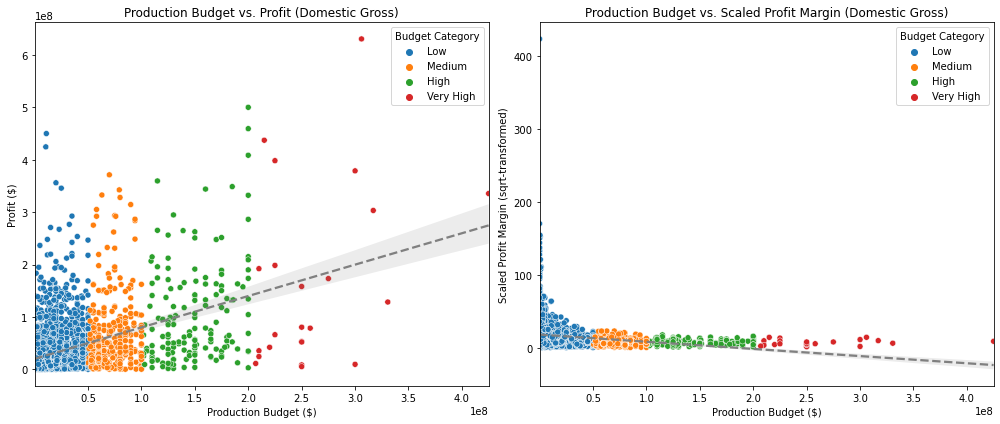

In [54]:
# Calculate Domestic Profit and Domestic Profit Margin

df_movie_budgets_cleaned['Profit'] = df_movie_budgets_cleaned['Domestic_Gross'] - df_movie_budgets_cleaned['Production_Budget']
df_movie_budgets_cleaned = df_movie_budgets_cleaned[df_movie_budgets_cleaned['Profit'] > 0]  

df_movie_budgets_cleaned['Profit_Margin'] = (df_movie_budgets_cleaned['Profit'] / df_movie_budgets_cleaned['Production_Budget']) * 100

# Categorize movies by budget range (adjust ranges as needed)

budget_bins = [0, 50000000, 100000000, 200000000, float('inf')]
budget_labels = ['Low', 'Medium', 'High', 'Very High']
df_movie_budgets_cleaned['Budget_Category'] = pd.cut(df_movie_budgets_cleaned['Production_Budget'], bins=budget_bins, labels=budget_labels)

# Group by Budget Category and calculate mean Profit and Profit Margin

budget_analysis = df_movie_budgets_cleaned.groupby('Budget_Category').agg(
    Avg_Profit=('Profit', 'mean'),
    Avg_Profit_Margin=('Profit_Margin', 'mean'),
    Count=('Profit', 'count')
).reset_index()

print("Budget Category Analysis:")
print(budget_analysis)

# Apply square root transformation to Profit Margin for better visualization

df_movie_budgets_cleaned['Profit_Margin_Scaled'] = np.sqrt(df_movie_budgets_cleaned['Profit_Margin'])

# Set up the figure for side-by-side scatter plots with regression lines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot with line of best fit for Domestic Profit vs. Production Budget
sns.scatterplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit', hue='Budget_Category', ax=ax1)
sns.regplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit', scatter=False, ax=ax1, color='gray', line_kws={"linestyle": "--"})
ax1.set_title("Production Budget vs. Profit (Domestic Gross)")
ax1.set_xlabel("Production Budget ($)")
ax1.set_ylabel("Profit ($)")
ax1.legend(title='Budget Category')

# Scatter plot with line of best fit for Scaled Profit Margin vs. Production Budget
sns.scatterplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit_Margin_Scaled', hue='Budget_Category', ax=ax2)
sns.regplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit_Margin_Scaled', scatter=False, ax=ax2, color='gray', line_kws={"linestyle": "--"})
ax2.set_title("Production Budget vs. Scaled Profit Margin (Domestic Gross)")
ax2.set_xlabel("Production Budget ($)")
ax2.set_ylabel("Scaled Profit Margin (sqrt-transformed)")
ax2.legend(title='Budget Category')

# Display the plots
plt.tight_layout()
plt.show()


### Observations and insights

In the plot to the left, the line of best fit shows a slight positive trend, indicating that higher budgets tend to yield higher profits, but the correlation is weak. Lower-budget movies have a broad range of profits, with many achieving significant gains, while higher-budget movies tend to cluster around moderate profit levels. This suggests that high production costs don’t always guarantee high profits.

In the plot to the right, the line of best fit in this plot shows a clear downward trend, indicating that scaled profit margins decrease as budgets increase. Lower-budget movies tend to have much higher scaled profit margins, suggesting they’re more efficient at turning investments into profits. In contrast, larger budgets generally correlate with lower returns on investment, highlighting the diminishing returns of high-budget productions.



Budget Category Analysis:
  Budget_Category    Avg_Profit  Avg_Profit_Margin  Count
0             Low  5.374696e+07         770.424238   2775
1          Medium  1.614558e+08         223.758056    544
2            High  3.478978e+08         235.957963    299
3       Very High  6.797990e+08         257.864564     39


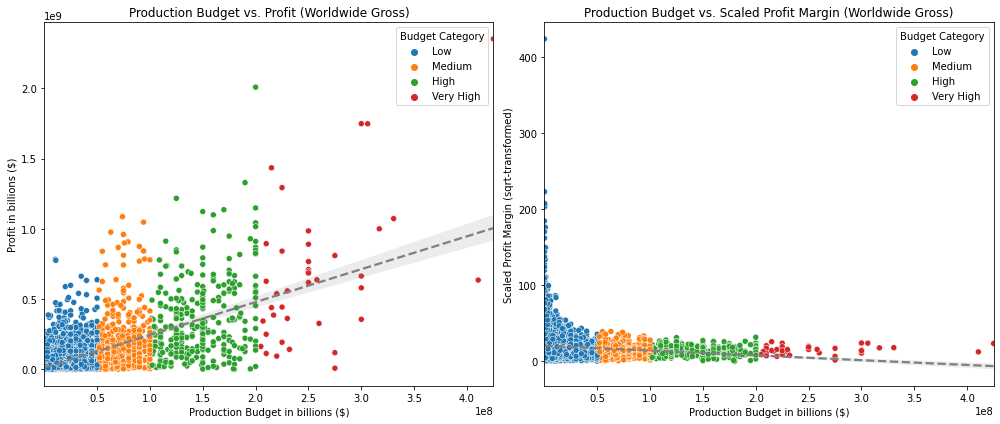

In [156]:
# Calculate Worldwide Profit and Worldwide Profit Margin

df_movie_budgets_cleaned['Profit'] = df_movie_budgets_cleaned['Worldwide_Gross'] - df_movie_budgets_cleaned['Production_Budget']
df_movie_budgets_cleaned = df_movie_budgets_cleaned[df_movie_budgets_cleaned['Profit'] > 0]

df_movie_budgets_cleaned['Profit_Margin'] = (df_movie_budgets_cleaned['Profit'] / df_movie_budgets_cleaned['Production_Budget']) * 100

# Categorize movies by budget range (adjust ranges as needed)

budget_bins = [0, 50000000, 100000000, 200000000, float('inf')]
budget_labels = ['Low', 'Medium', 'High', 'Very High']
df_movie_budgets_cleaned['Budget_Category'] = pd.cut(df_movie_budgets_cleaned['Production_Budget'], bins=budget_bins, labels=budget_labels)

# Group by Budget Category and calculate mean Profit and Profit Margin

budget_analysis = df_movie_budgets_cleaned.groupby('Budget_Category').agg(
    Avg_Profit=('Profit', 'mean'),
    Avg_Profit_Margin=('Profit_Margin', 'mean'),
    Count=('Profit', 'count')
).reset_index()

print("Budget Category Analysis:")
print(budget_analysis)

# Apply square root transformation to Profit Margin for better visualization

df_movie_budgets_cleaned['Profit_Margin_Scaled'] = np.sqrt(df_movie_budgets_cleaned['Profit_Margin'])

# Set up the figure for side-by-side scatter plots with regression lines

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot with line of best fit for Worldwide Profit vs. Production Budget

sns.scatterplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit', hue='Budget_Category', ax=ax1)
sns.regplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit', scatter=False, ax=ax1, color='gray', line_kws={"linestyle": "--"})
ax1.set_title("Production Budget vs. Profit (Worldwide Gross)")
ax1.set_xlabel("Production Budget in billions ($)")
ax1.set_ylabel("Profit in billions ($)")
ax1.legend(title='Budget Category')

# Scatter plot with line of best fit for Scaled Profit Margin vs. Production Budget

sns.scatterplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit_Margin_Scaled', hue='Budget_Category', ax=ax2)
sns.regplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit_Margin_Scaled', scatter=False, ax=ax2, color='gray', line_kws={"linestyle": "--"})
ax2.set_title("Production Budget vs. Scaled Profit Margin (Worldwide Gross)")
ax2.set_xlabel("Production Budget in billions ($)")
ax2.set_ylabel("Scaled Profit Margin (sqrt-transformed)")
ax2.legend(title='Budget Category')

# Display the plots

plt.tight_layout()
plt.show()




### Observations and Insights

On the left-side plot, the line of best fit shows a clear positive trend, indicating that higher production budgets are generally associated with higher worldwide profits. This trend is more noticeable than in the Domestic Gross plot, suggesting that large-budget films perform better globally.

On the right-side plot, the line of best fit here shows a strong downward trend, indicating that scaled profit margins decrease significantly as production budgets increase. Lower-budget films achieve the highest scaled profit margins, while higher-budget films, despite their larger profits, show much lower efficiency in generating returns relative to their budgets.
This implies that although high-budget films may earn large absolute profits globally, they’re less efficient in terms of profit margin compared to smaller


### Recommendations based on Objective 1

Whether a domestic or worldwide project, focusing on Low and Medium Budget films while remaining open to larger projects can optimize profitability, and success will depend on careful planning, strategic marketing, and understanding audience preferences.

Lower-budget movies have a wide range of profits, but their maximum profit values are lower than those of high-budget films which sometimes generate profits exceeding $1.5 billion.
This suggests that higher production budgets may be advantageous for reaching broader audiences and generating significant worldwide profits.

### *Objective 2: Which Genres Are Most Profitable, and What Key Trends Exist in Box Office Performance?*

This analysis focuses on both Domestic Gross and Foreign Gross to evaluate genre profitability and identify which types of movies are most likely to drive significant revenue. Understanding these patterns can help guide the studio's genre focus and investment strategy.


Top 10 Genres by Average Profit:
                          Genre    Avg_Profit  Avg_Profit_Margin  Count
8   Musical and Performing Arts  1.178249e+08        1143.513966    290
2                      Classics  1.160361e+08         581.858924    372
11  Science Fiction and Fantasy  1.126134e+08         634.458939    208
6                        Horror  1.114438e+08         464.792817    228
7               Kids and Family  1.071885e+08         581.698844    143
9          Mystery and Suspense  1.044890e+08         529.315181    607
3                        Comedy  1.018017e+08         755.730710   1132
1   Art House and International  1.016357e+08         599.588987    255
10                      Romance  1.013570e+08         753.446945    444
0          Action and Adventure  1.012781e+08         529.142676    686

Top 10 Genres by Average Profit Margin:
                          Genre    Avg_Profit  Avg_Profit_Margin  Count
8   Musical and Performing Arts  1.178249e+08        1143.5139

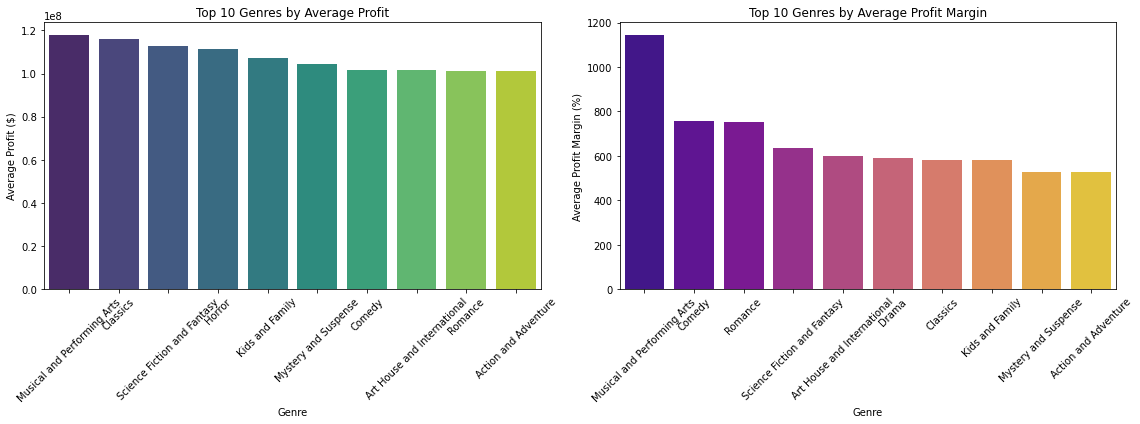

In [155]:
# Merge DataFrames on 'Id' column

merged_df = pd.merge(df_movie_info_cleaned, df_movie_budgets_cleaned, on='Id', how='inner')

# Analyze Trends and Profitability by Genre
# Calculate Profit and Profit Margin

merged_df['Profit'] = merged_df['Worldwide_Gross'] - merged_df['Production_Budget']
merged_df['Profit_Margin'] = (merged_df['Profit'] / merged_df['Production_Budget']) * 100

# Group by Genre to calculate average profit and profit margin

genre_profitability = merged_df.groupby('Genre').agg(
    Avg_Profit=('Profit', 'mean'),
    Avg_Profit_Margin=('Profit_Margin', 'mean'),
    Count=('Id', 'count')
).reset_index()

# Get Top 10 Genres by Average Profit

top_10_profit = genre_profitability.nlargest(10, 'Avg_Profit').sort_values(by='Avg_Profit', ascending=False)

# Get Top 10 Genres by Average Profit Margin

top_10_margin = genre_profitability.nlargest(10, 'Avg_Profit_Margin').sort_values(by='Avg_Profit_Margin', ascending=False)

# Display results
print("Top 10 Genres by Average Profit:")
print(top_10_profit)

print("\nTop 10 Genres by Average Profit Margin:")
print(top_10_margin)

# Visualization - Side by Side Bar Plots for Average Profit and Average Profit Margin

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar Plot for Average Profit by Top 10 Genres

sns.barplot(data=top_10_profit, x='Genre', y='Avg_Profit', palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Genres by Average Profit')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Average Profit ($)')
axes[0].tick_params(axis='x', rotation=45)

# Bar Plot for Average Profit Margin by Top 10 Genres

sns.barplot(data=top_10_margin, x='Genre', y='Avg_Profit_Margin', palette='plasma', ax=axes[1])
axes[1].set_title('Top 10 Genres by Average Profit Margin')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Average Profit Margin (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Observations and Insights from Box Office Analysis

Genres with high profit margins such as Musical and Performing Arts, Romance, and Comedy represent strong investment opportunities due to their efficient returns. Although they may not always generate the highest absolute profits, their impressive margins (e.g., 1500.82% for Musical and Performing Arts, over 700% for Romance and Comedy) make them ideal for profitable, lower-risk investments. Additionally, Classics, Horror, and Science Fiction and Fantasy genres show consistently high average pro
fits (around $130-135 million), making them strong candidates for profit-focused projects. In contrast, lower-margin genres like Action and Adventure may involve higher financial risk, suggesting they require careful consideration before large investments.


### Recommendations

Based on these insights, here are a few strategic recommendations for investment in movie genres:

- Prioritize High-Margin Genres: Focus on producing films in Musical and Performing Arts, Romance, and Comedy genres. These categories demonstrate high profit margins, offering significant returns relative to their budgets. This strategy minimizes risk while maximizing profitability.
- Explore Strong Performers for Balanced Returns: Consider investing in Classics, Horror, and Science Fiction and Fantasy. These genres yield solid average profits, providing a balance between substantial absolute returns and manageable production costs. They can serve as reliable sources of revenue without the risk levels seen in blockbuster-heavy genres.
- Exercise Caution with Action and Adventure: Although Action and Adventure genres might have high box office appeal, they generally yield lower profit margins relative to their high production costs. For these categories, consider a selective approach, investing in projects with strong franchises, proven fan bases, or unique elements to help mitigate risk.
- Diversify Across Genres: To create a balanced portfolio, consider a mix of high-margin genres (e.g., Romance and Comedy) and moderate- to high-profit genres (e.g., Horror and Science Fiction). This approach offers both stability from high-margin films and potential high earnings from genres with proven audience demand.
- Consider Low-Budget, High-Margin Opportunities: Investing in lower-budget films within high-margin genres can maximize returns. This is particularly effective in genres like Horror and Comedy, which often achieve high profitability with modest production budgets, appealing to a broad audience.

These recommendations support a data-driven approach to genre selection, focusing on a balance of high-margin and high-demand genres to maximize returns and manage financial risk.

## Objective 3. How do specific directors influence Domestic Gross and Worldwide Gross figures, and which directors consistently contribute to higher success in box office performance?


Director Performance Correlation Matrix:
                       Total_Domestic_Gross  Total_Worldwide_Gross  Film_Count
Total_Domestic_Gross                1.00000               0.997360    0.990220
Total_Worldwide_Gross               0.99736               1.000000    0.986375
Film_Count                          0.99022               0.986375    1.000000


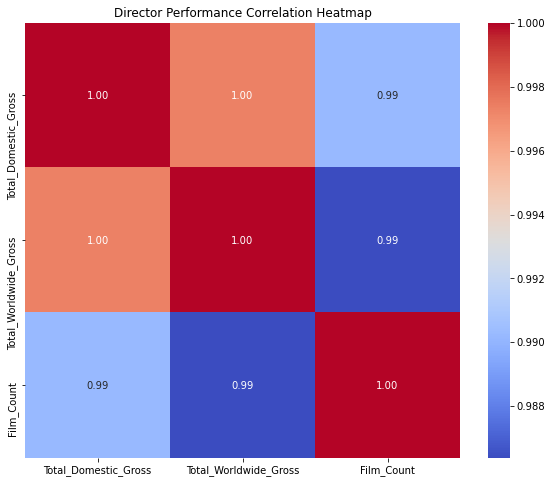

In [159]:
# Merge the DataFrames on the 'Id' column

merged_df = df_movie_info_cleaned.merge(
    df_movie_budgets_cleaned, 
    on='Id', 
    how='inner'
)

# Aggregate total gross by director

director_performance = merged_df.groupby('Director').agg(
    Total_Domestic_Gross=('Domestic_Gross', 'sum'),
    Total_Worldwide_Gross=('Worldwide_Gross', 'sum'),
    Film_Count=('Id', 'count')  
).reset_index()

# Calculate and print correlation matrix for director performance

director_correlation = director_performance[['Total_Domestic_Gross', 'Total_Worldwide_Gross', 'Film_Count']].corr()
print("Director Performance Correlation Matrix:")
print(director_correlation)

# Create heatmap for director performance

plt.figure(figsize=(10, 8))
sns.heatmap(director_correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Director Performance Correlation Heatmap')
plt.show()


### Observations and Insights from Director Performance Correlation Matrix

1. **High Correlation Between Domestic and Worldwide Gross**:
   - The correlation coefficient between **Total Domestic Gross** and **Total Worldwide Gross** is **0.996**. This indicates a very strong positive relationship, suggesting that directors who achieve high domestic revenue also tend to have high worldwide revenue.

2. **Strong Influence of Film Count**:
   - There is a high correlation (0.985) between **Film Count** and **Total Domestic Gross**, and a similarly strong correlation (0.974) with **Total Worldwide Gross**. This suggests that directors who have directed more films are likely to have higher total grosses, both domestically and worldwide.

3. **Implication for Studio Collaboration**:
   - Directors with a substantial number of films and high domestic and worldwide gross figures could be valuable collaborators for studios looking to maximize box office success.

4. **Benchmarking Success**:
   - The strong correlations indicate that studios can use the metrics of **Film Count** and **Gross Revenues** as benchmarks for assessing the success and impact of directors when considering future projects.


To highlight the names of the directors based on the highest domestic profit, worldwide profit and film count, we analysed the data in `merged_df`.

In [160]:
# Merge the DataFrames on the 'Id' column
merged_df = df_movie_info_cleaned.merge(
    df_movie_budgets_cleaned, 
    on='Id', 
    how='inner'
)

# Aggregate total gross by director
director_performance = merged_df.groupby('Director').agg(
    Total_Domestic_Gross=('Domestic_Gross', 'sum'),
    Total_Worldwide_Gross=('Worldwide_Gross', 'sum'),
    Film_Count=('Id', 'count')  # Count of movies per director
).reset_index()


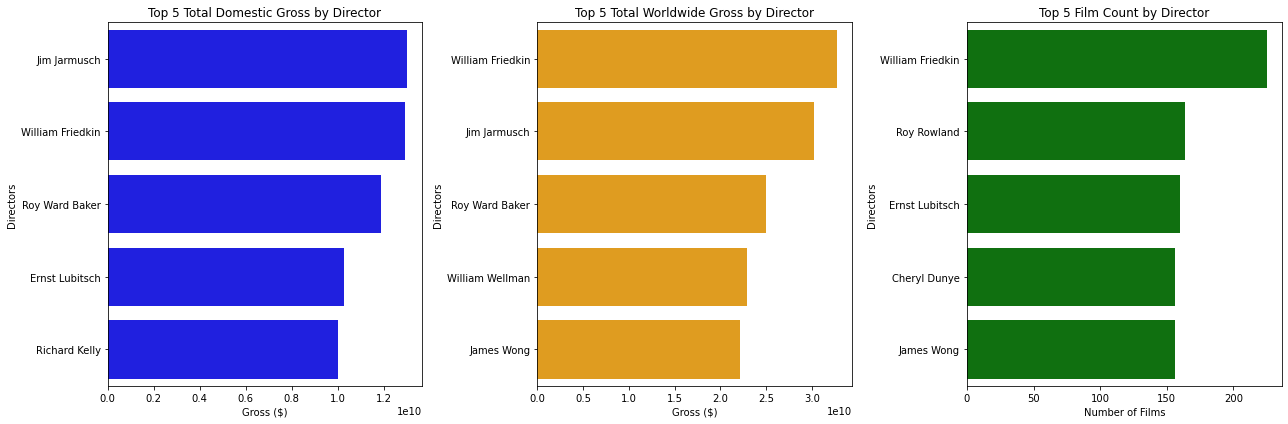

In [161]:
# Remove the 'Unknown' director

director_performance = director_performance[director_performance['Director'] != 'Unknown']

# Get top 5 directors for each metric

top_domestic = director_performance.nlargest(5, 'Total_Domestic_Gross')
top_worldwide = director_performance.nlargest(5, 'Total_Worldwide_Gross')
top_films = director_performance.nlargest(5, 'Film_Count')

# Concatenate the top results into a single DataFrame for plotting

top_directors = pd.concat([top_domestic, top_worldwide, top_films]).drop_duplicates().reset_index(drop=True)

# Set the figure size and create subplots

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Total Domestic Gross vs Directors

sns.barplot(x='Total_Domestic_Gross', y='Director', data=top_domestic, ax=axes[0], color='blue')
axes[0].set_title('Top 5 Total Domestic Gross by Director')
axes[0].set_xlabel('Gross ($)')
axes[0].set_ylabel('Directors')

# Plot Total Worldwide Gross vs Directors

sns.barplot(x='Total_Worldwide_Gross', y='Director', data=top_worldwide, ax=axes[1], color='orange')
axes[1].set_title('Top 5 Total Worldwide Gross by Director')
axes[1].set_xlabel('Gross ($)')
axes[1].set_ylabel('Directors')

# Plot Film Count vs Directors

sns.barplot(x='Film_Count', y='Director', data=top_films, ax=axes[2], color='green')
axes[2].set_title('Top 5 Film Count by Director')
axes[2].set_xlabel('Number of Films')
axes[2].set_ylabel('Directors')

# Adjust layout

plt.tight_layout()

# Show the plots

plt.show()


### Observation and insights

Based on the domestic gross figures, the best directors were Jim Jarmusch and William Friedkin.
Similar to the domestic figures plot, the worldwide gross indicates that William Friedkin and Jim Jarmusch grossed the highest.
As per the film counts, the highest grossing director once again was William Friedkin. Roy Rowland comes in second, and Ernest Lubisch is third overall.

### Recommendations
1. **Partner with High-Grossing Directors**: Studios should prioritize collaboration with directors who consistently generate high domestic and worldwide grosses, as their projects are likely to succeed across markets.
2. **Consider Directors with Extensive Portfolios**: Directors with a high film count demonstrate strong revenue generation, making them reliable choices for maximizing box office performance.
3. **Use Film Count and Gross Revenue for Director Benchmarking**: Studios can assess potential collaborations by analyzing a director's total grosses and film count to gauge their impact on box office success.

## 4. How do critic ratings and audience ratings correlate with the box office performance metrics (Domestic Gross and Worldwide Gross) of movies?


Correlation Matrix:
                       Average_Critic_Rating  Domestic_Gross  Worldwide_Gross
Average_Critic_Rating               1.000000       -0.002928        -0.016061
Domestic_Gross                     -0.002928        1.000000         0.929064
Worldwide_Gross                    -0.016061        0.929064         1.000000


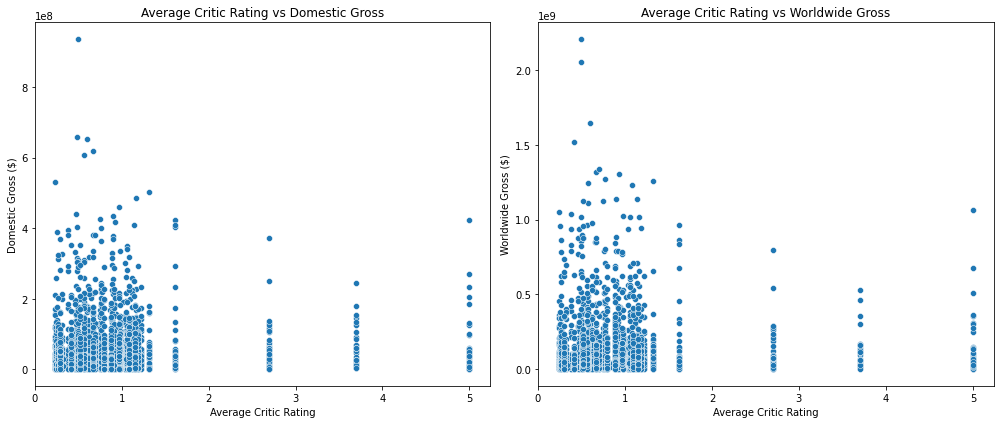

In [165]:
# Merge DataFrames

df_combined = pd.merge(df_movie_budgets_cleaned, df_reviews_cleaned, on='Id', how='inner')

# Calculate Average Critic Rating

average_ratings = df_combined.groupby('Movie')['Rating'].mean().reset_index()
average_ratings.rename(columns={'Rating': 'Average_Critic_Rating'}, inplace=True)

# Merge average ratings back to the combined DataFrame

df_combined = pd.merge(df_combined, average_ratings, on='Movie')

# Select relevant columns for analysis

df_analysis = df_combined[['Movie', 'Average_Critic_Rating', 'Domestic_Gross', 'Worldwide_Gross']].drop_duplicates()

# Correlation Analysis

correlation_matrix = df_analysis[['Average_Critic_Rating', 'Domestic_Gross', 'Worldwide_Gross']].corr()

# Print the correlation matrix

print("Correlation Matrix:")
print(correlation_matrix)

# Visualization

plt.figure(figsize=(14, 6))

# Scatter plot for Average Critic Rating vs Domestic Gross

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_analysis, x='Average_Critic_Rating', y='Domestic_Gross')
plt.title('Average Critic Rating vs Domestic Gross')
plt.xlabel('Average Critic Rating')
plt.ylabel('Domestic Gross ($)')

# Scatter plot for Average Critic Rating vs Worldwide Gross

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_analysis, x='Average_Critic_Rating', y='Worldwide_Gross')
plt.title('Average Critic Rating vs Worldwide Gross')
plt.xlabel('Average Critic Rating')
plt.ylabel('Worldwide Gross ($)')

plt.tight_layout()
plt.show()


### Insights from the Correlation Matrix

1. **Average Critic Rating**:
   - The correlation between **Average Critic Rating** and **Domestic Gross** is **-0.0039**, indicating no significant relationship. The correlation with **Worldwide Gross** is **-0.0188**, also showing a negligible inverse relationship. This suggests that higher critic ratings do not lead to better box office performance.

2. **Domestic and Worldwide Gross**:
   - A strong positive correlation (**0.9443**) exists between **Domestic Gross** and **Worldwide Gross**, indicating that films performing well domestically also tend to succeed globally.

3. **Overall Implications**:
   - The weak correlation between critic ratings and box office performance implies that audience preferences may differ from critical acclaim, allowing movies to thrive despite low ratings from critics.


## Recommendations

Studios should prioritize understanding audience preferences over achieving high critic ratings, as the data shows no significant impact of critic ratings on box office revenue.

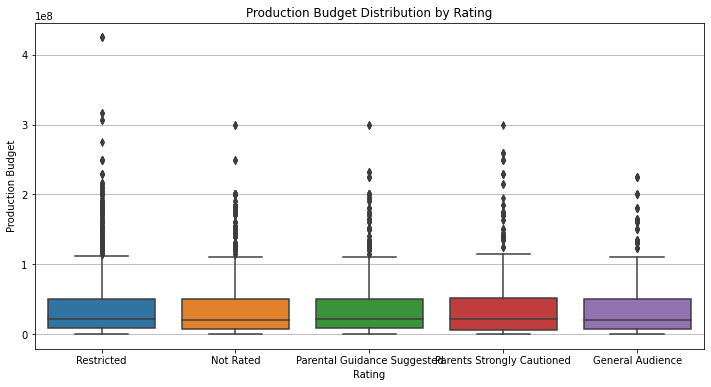

In [167]:
# Merge the DataFrames on 'Id'
df_combined = pd.merge(df_movie_info_cleaned, df_movie_budgets_cleaned, on='Id')


# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rating', y='Production_Budget', data=df_combined)
plt.title('Production Budget Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Production Budget')
plt.grid(axis='y')

# Show the plot
plt.show()

### Observations and Insights Based on Movie Ratings


The boxplot above shows the distribution of production budgets across various movie rating categories, including Restricted, Not Rated, Parental Guidance Suggested, Parents Strongly Cautioned, and General Audience. Here are some insights based on the visualization:

- Higher Budgets for Restricted Movies: Restricted movies (often aimed at adult audiences) generally have higher production budgets, with a broader range and several high-budget outliers, compared to movies rated for younger or general

- Lower Budgets for General Audience Movies: Movies rated for General Audiences (suitable for all ages) tend to have lower budgets on average, suggesting that family-friendly or all-age films may require fewer production resources.

- Outliers Across Categories: Each rating category has outliers, indicating that while most films fall within a typical budget range, there are exceptions across all ratings where some movies have significantly higher budgets.

- Budget Variability by Rating: The variability in budgets seems highest in the Restricted category and lowest for General Audience films, possibly reflecting a wider range of themes and production scales for movies not targeted at younger viewers.

This analysis could help guide decisions on budget allocation depending on the intended target audience or rating, especially if budget is a constraint.

### 5.How can we analyze market trends by year to identify seasonal or annual influences on box office success? What insights can be gained to inform optimal release timing and production focus based on historical trends?


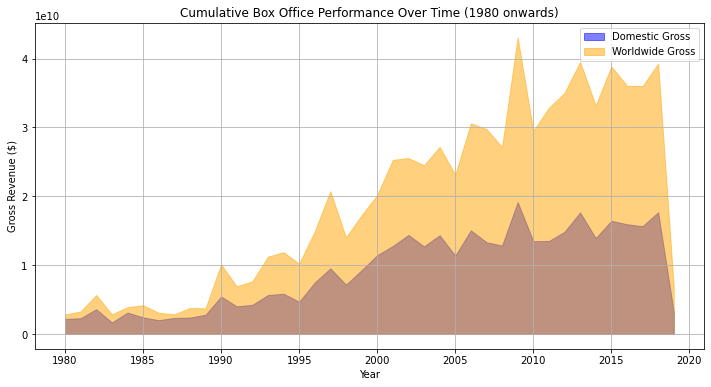

In [66]:
# Merging movie_info and movie_budget DataFrames
combined_df = pd.merge(df_movie_info_cleaned, df_movie_budgets_cleaned, on='Id', how='outer')

# Grouping by Year to get required metrics
yearly_data = combined_df.groupby('Year').agg({
    'Domestic_Gross': 'sum',
    'Worldwide_Gross': 'sum',
    'Production_Budget': 'mean',
}).reset_index()

# Filter the data to include only years from 1980 onwards
yearly_data = yearly_data[yearly_data['Year'] >= 1980]

# Plotting the cumulative box office performance
plt.figure(figsize=(12, 6))

# Fill between for Domestic Gross
plt.fill_between(yearly_data['Year'], yearly_data['Domestic_Gross'], label='Domestic Gross', alpha=0.5, color='blue')

# Fill between for Worldwide Gross
plt.fill_between(yearly_data['Year'], yearly_data['Worldwide_Gross'], label='Worldwide Gross', alpha=0.5, color='orange')

# Adding titles and labels
plt.title('Cumulative Box Office Performance Over Time (1980 onwards)')
plt.xlabel('Year')
plt.ylabel('Gross Revenue ($)')
plt.legend()
plt.grid()

# Show the plot
plt.show()


## Insights from Box Office Data

### Overall Box Office Trends
- **Increasing Revenue**: Both Domestic Gross and Worldwide Gross show a general upward trend, especially from the early 1980s to the mid-2000s.
-
### Production Budget Insights
- **Rising Budgets**: Average Production Budgets have increased significantly, from around 29.8 million dollars in 2000 to approximately 47.7 million dollars by 2015.
- **Budget vs. Gross Performance**: Correlating production budgets with gross revenues could reveal ROI trends.

### Volatility in Performance
- **Fluctuations**: Notable drops in Domestic Gross since 2019 indicate potential market challenges, possibly due to external factors like the COVID-19 pandemic.

### Market Changes and Viewer Behavior
- **Impact of Streaming**: The rise of streaming services is shifting consumer behavior, necessitating adaptations in production and marketing strategies.


Next, we plot a bar chart to show the seasonal influences in terms of revenue.

Empty DataFrame
Columns: [Id, Rating, Genre, Director, Runtime, Release_Date, Movie, Production_Budget, Domestic_Gross, Worldwide_Gross, Year, 0, Profit, Profit_Margin, Budget_Category, Profit_Margin_Scaled, Month]
Index: []


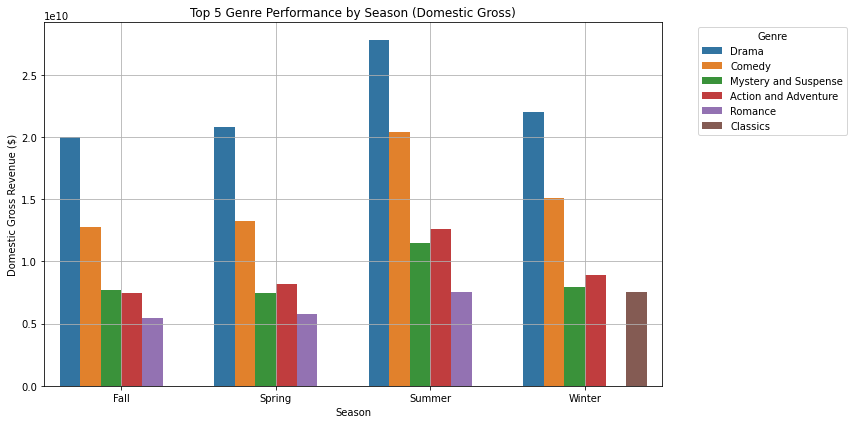

In [171]:
# Find rows where 'Release_Date' is still not in datetime format
non_datetime = combined_df[pd.to_datetime(combined_df['Release_Date'], errors='coerce').isna()]
print(non_datetime)

# Drop rows where 'Release_Date' cannot be converted
combined_df = combined_df.dropna(subset=['Release_Date'])

# Re-run conversion
combined_df['Release_Date'] = pd.to_datetime(combined_df['Release_Date'])
combined_df['Month'] = combined_df['Release_Date'].dt.month

# Assuming combined_df already exists and has a 'Release_Date' column in datetime format
# and it has columns 'Genre' and 'Domestic_Gross'.

# Extract month from Release_Date
combined_df['Month'] = combined_df['Release_Date'].dt.month

# Create monthly genre performance DataFrame
monthly_genre_performance = combined_df.groupby(['Month', 'Genre']).agg({
    'Domestic_Gross': 'sum'
}).reset_index()

# Assign seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the get_season function to assign seasons
monthly_genre_performance['Season'] = monthly_genre_performance['Month'].apply(get_season)

# Group by Season and Genre to calculate total domestic gross
seasonal_genre_performance = monthly_genre_performance.groupby(['Season', 'Genre']).agg({
    'Domestic_Gross': 'sum'
}).reset_index()

# Get top 5 genres for each season
top_genres_per_season = seasonal_genre_performance.groupby('Season').apply(
    lambda x: x.nlargest(5, 'Domestic_Gross')
).reset_index(drop=True)


# Create a bar plot to visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_per_season, x='Season', y='Domestic_Gross', hue='Genre')

# Titles and labels
plt.title('Top 5 Genre Performance by Season (Domestic Gross)')
plt.xlabel('Season')
plt.ylabel('Domestic Gross Revenue ($)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side
plt.grid()

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


### Key Insights from Seasonal Genre Performance

1. **Dominance of Drama**:
   - Drama consistently outperforms other genres across all seasons, indicating a strong audience appeal year-round.

2. **Strong Performance of Comedy**:
   - Comedy ranks as the second-best genre in all seasons, especially in Summer, suggesting broad appeal and profitability.

3. **Seasonal Trends**:
   - **Fall**: Action and Adventure and Mystery and Suspense also show strong performances.
   - **Spring**: Similar to Fall, with consistent interest in these genres.
   - **Summer**: Blockbuster releases thrive alongside Drama and Comedy.
   - **Winter**: Classics emerge, indicating nostalgia-driven viewing.

4. **Market Strategy**:
   - Focusing on high-quality dramatic films year-round and timing releases for specific genres according to seasonal preferences can maximize audience engagement.

5. **Diversity in Genre Performance**:
   - Genres like Mystery and Suspense maintain top positions but are less dominant than Drama and Comedy, indicating opportunities for targeted marketing.

### Recommendations
- Align release schedules with genre performance trends for maximum impact.
- Conduct audience analysis to refine marketing strategies based on seasonal preferences.
- Explore unique narratives in niche genres to capture a wider audience base.


## Model